 PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. `Dataset `stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the Dataset to enable easy access to the samples.

In [ ]:
import torch
from torch.utils.data import Dataset,  DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np
from PIL import Image
import random

## Built-in dataset

[Image Datasets](https://pytorch.org/vision/stable/datasets.html), [Text Datasets](https://pytorch.org/text/stable/datasets.html), and [Audio Datasets](https://pytorch.org/audio/stable/datasets.html)

Torchvision provides many built-in datasets in the `torchvision.datasets` module, as well as utility classes for building your own datasets.

All datasets are subclasses of `torch.utils.data.Dataset` i.e, they have `__getitem__` and `__len__` methods implemented.





Recall from last lecture:

CLASS `torch.utils.data.Dataset(*args, **kwds)`

An abstract class representing a Dataset.

All datasets that represent a map from keys to data samples should subclass it. All subclasses

*   should overwrite `__getitem__()`, supporting fetching a data
sample for a given key.
*   optionally overwrite `__len__()`, which is expected to return the size of the dataset
* optionally implement `__getitems__()`, for speedup batched samples loading.


Hence, they can all be passed to a `torch.utils.data.DataLoader` which can load multiple samples in parallel using torch.multiprocessing workers.

## Transform

Let's first define some traqnsformation we can do on the downloaded images.

Fro more information visit [trochvision.transform ](https://pytorch.org/vision/0.9/transforms.html)

Here we will just  apply to simple transofrmation to our PIL images:


1.   Transforms on PIL Image and torch.Tensor
2.   Normalize a tensor image with mean and standard deviation



In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

## Load the data

In [ ]:
trainset = datasets.CIFAR10(root='./data',
                            train=True,
                            download=True,
                            transform=transform)


testset = datasets.CIFAR10(root='./data',
                           train=False,
                           download=True,
                           transform=transform)

100%|██████████| 170498071/170498071 [00:02<00:00, 69637651.38it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


We have the following parameters:


*   `root` is the path where data is stored,
*   `train` specifies training or test dataset,
*   `download=True` downloads the data from the internet if it’s not available at root.
*   `transform` specify the feature transformations
*   `target_transform` for  label transformations



In [ ]:
trainset[0]

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [ ]:
trainset[0][0].shape

torch.Size([3, 32, 32])

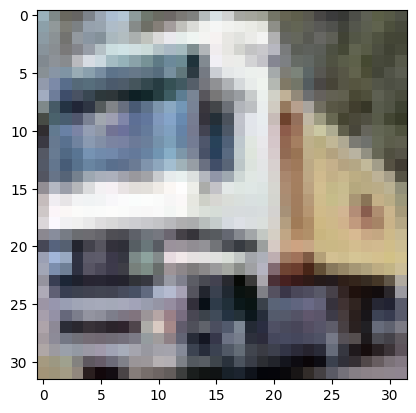

In [ ]:
img = trainset[1][0]
img = img / 2 + 0.5
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

In [ ]:
batch_size = 8

train_loader = DataLoader(trainset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=2)

test_loader = DataLoader(testset,
                         batch_size=batch_size,
                         shuffle=False,
                         num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

num workers: Here’s a summary of [some references,](https://discuss.pytorch.org/t/guidelines-for-assigning-num-workers-to-dataloader/813) and suggestions:


1.   num_workers=0 means ONLY the main process will load batches (that can be a bottleneck).
2.  num_workers=1 means ONLY one worker (just not the main process) will load data, but it will still be slow.
3. The performance of high num_workers depends on the batch size and your machine.
4. A general place to start is to set num_workers equal to the number of CPU cores on that machine. You can get the number of CPU cores in Python using os.cpu_count(), but note that depending on your batch size, you may overflow CPU RAM.



Increasing num_workers will ALSO increase your CPU memory consumption.
The best thing to do is to increase the num_workers slowly and stop once there is no more improvement in your training speed.
For debugging purposes or for dataloaders that load very small datasets, it is desirable to set num_workers=0. However, this may log a warning that you’re not using enough workers.


In [ ]:
a = next(iter(test_loader))

In [ ]:
len(a)

2

In [ ]:
a[0].shape

torch.Size([8, 3, 32, 32])

In [ ]:
a[1].size()

torch.Size([8])

In [ ]:
a[1]

tensor([3, 8, 8, 0, 6, 6, 1, 6])

## Custom dataset

Suppose in some case we have our own data and what to write a customized Daset

In [ ]:
class Noisy_Images_CIFAR10(Dataset):
    def __init__(self,
                 root,
                 train=True,
                 transform=None,
                 target_transform=None,
                 download=False,
                 std= 0.1,
                 mean=0):
        self.cifar10 = datasets.CIFAR10(
            root=root,
            train=train,
            transform=transform,
            target_transform=target_transform,
            download=download)
        self.std = std
        self.mean = mean

    def __len__(self):
        return len(self.cifar10)


    def __getitem__(self, index):
        image, label = self.cifar10[index]
        image = image + torch.randn(image.size()) * self.std + self.mean
        return image, label


transform = transforms.Compose([transforms.ToTensor()])

custom_dataset = Noisy_Images_CIFAR10(
    root='./data',
    train=True,
    transform=transform,
    download=True)


Files already downloaded and verified


In [ ]:
custom_dataset[0][0].shape

torch.Size([3, 32, 32])

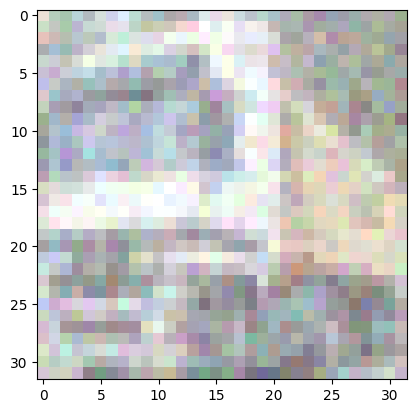

In [ ]:
img = custom_dataset[1][0]
img = img / 2 + 0.5
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

###Exercise 1: Creating a Custom Dataset with Noisy Labels in PyTorch

Objective: In this exercise, you will customize a dataset built upon CIFAR-10 and intentionally introduce incorrect labels to a subset of the data. The incorrect labels will be randomly assigned to a portion of the dataset. You can specify the error rate (the fraction of misclassified samples) as an input to the dataset class. Specifically, for a given noise_rate, a fraction (1 - noise_rate) of the dataset will have the correct labels, while the remaining noise_rate fraction will receive random labels selected uniformly from 0 to 9.
###Exercise 2: Creating a Custom Dataset with Binary labels from CIFAR 10

The classes in CIFAR 10 are the following:
classes = (0: plane',
           1: 'car',
           2: 'bird',
           3: 'cat',
           4: 'deer',
           5: 'dog',
           6: 'frog',
           7: 'horse',
           8: 'ship',
           9: 'truck')

Objective: In this exercise, you will create a custom dataset based on CIFAR-10 with binary labels. The goal is to reassign labels such that elements originally labeled as 0, 1, 8, and 9 are assigned the label 0, while elements with original labels 3, 4, 5, 6, and 7 are assigned the label 1.


### Exercise3: Implementing Mix-Up Augmentation for CIFAR-10


Mixup is a data augmentation technique that combines pairs of examples via a convex combination of the images and the labels. Given images $x_i$ and $x_j$ with labels $y_i$ and $y_j$, respectively, and $\lambda \in [0,1]$, mixup creates a new image $\hat{x}$ with label $\hat{y}$ the following way:

\begin{align}
\hat{x} = \lambda x_i + (1-\lambda) x_j \quad \text{and} \quad \hat{y} = \lambda y_i + (1-\lambda) y_j
\end{align}

[Original Paper](https://arxiv.org/abs/1710.09412)

Objective: In this exercise, you will implement a Mix-Up augmentation for the CIFAR-10 dataset. Mix-Up is a data augmentation technique that blends two images and their corresponding labels to create a new training sample. The objective is to improve the robustness and generalization of deep learning models.



### Eercise 4 : Data Augmentation

Applies data augmentation (flipping, cropping, color adjustments, and rotation, see [torch.transform](https://pytorch.org/vision/0.9/transforms.html) )  to create variations of CIFAR-10 images.
Extends the dataset with these augmented images to have five times more training data.
Sets up a DataLoader for training using the augmented dataset.
This process increases the dataset size for improved model training.

Notice that there are multiple valid approaches to completing each exercise!!

##Lighting Datamodule

A datamodule encapsulates the five steps involved in data processing in PyTorch:

Download / tokenize / process.
Clean and (maybe) save to disk.
Load inside Dataset.
Apply transforms (rotate, tokenize, etc…).
Wrap inside a DataLoader.

In [ ]:
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 62.8 MB/s eta 0:00:00


The LightningDataModule is a convenient way to manage data in PyTorch Lightning. It encapsulates training, validation, testing, and prediction dataloaders, as well as any necessary steps for data processing, downloads, and transformations. By using a LightningDataModule, you can easily develop dataset-agnostic models, hot-swap different datasets, and share data splits and transformations across projects.

LightningDataModule API

To define a DataModule the following methods are used to create train/val/test/predict dataloaders:



*   prepare_data (how to download, tokenize, etc…) :
Downloading and saving data. Lightning ensures the prepare_data() is called only within a single process on CPU
*   setup (how to split, define dataset, etc…):
Use setup() for operations you might want to perform on every GPU.

*  train_dataloader
*  val_dataloader
*  test_dataloader
*  predict_dataloader

In [ ]:
import pytorch_lightning as pl
from torch.utils.data import random_split, DataLoader
import torchvision
from torchvision.datasets import CIFAR10
from torchvision import transforms

class CIFAR10DataModule(pl.LightningDataModule):
    def __init__(self, data_dir: str = "./"):
        super().__init__()
        self.data_dir = data_dir
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

        self.dims = (3, 32, 32)
        self.num_classes = 10

    def prepare_data(self):
        # download
        torchvision.datasets.CIFAR10(self.data_dir, train=True, download=True)
        torchvision.datasets.CIFAR10(self.data_dir, train=False, download=True)

    def setup(self, stage=None):

        # Assign train/val datasets for use in dataloaders
        if stage == "fit" or stage is None:
            cifar_full =  torchvision.datasets.CIFAR10(self.data_dir, train=True, transform=self.transform)
            self.cifar_train, self.cifar_val = torch.utils.data.random_split(cifar_full, [45000, 5000])

        # Assign test dataset for use in dataloader(s)
        if stage == "test" or stage is None:
            self.cifar_test = torchvision.datasets.CIFAR10(self.data_dir, train=False, transform=self.transform)

    def train_dataloader(self):
        return torch.utils.data.DataLoader(self.cifar_train, batch_size=BATCH_SIZE)

    def val_dataloader(self):
        return  torch.utils.data.DataLoader(self.cifar_val, batch_size=BATCH_SIZE)

    def test_dataloader(self):
        return  torch.utils.data.DataLoader(self.cifar_test, batch_size=BATCH_SIZE)